# Bài tập Scalling (StandardScaler và MinMaxScaler)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [17]:
# Lấy 2 cột Area và Price với điều kiện đủ giá trị
X = df[['Area', 'Price']].dropna()

In [18]:
# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler # thư viện cần có 
std_scaled = StandardScaler().fit_transform(X)       # standardization (chuẩn hóa) 
mm_scaled  = MinMaxScaler().fit_transform(X)         # normalization [0,1] (quy chuẩn)

In [19]:
X['Area_std'],  X['Price_std']  = std_scaled[:,0], std_scaled[:,1] # lấy tất cả dòng và cột tương ứng
X['Area_mm'],   X['Price_mm']   = mm_scaled[:,0],   mm_scaled[:,1]

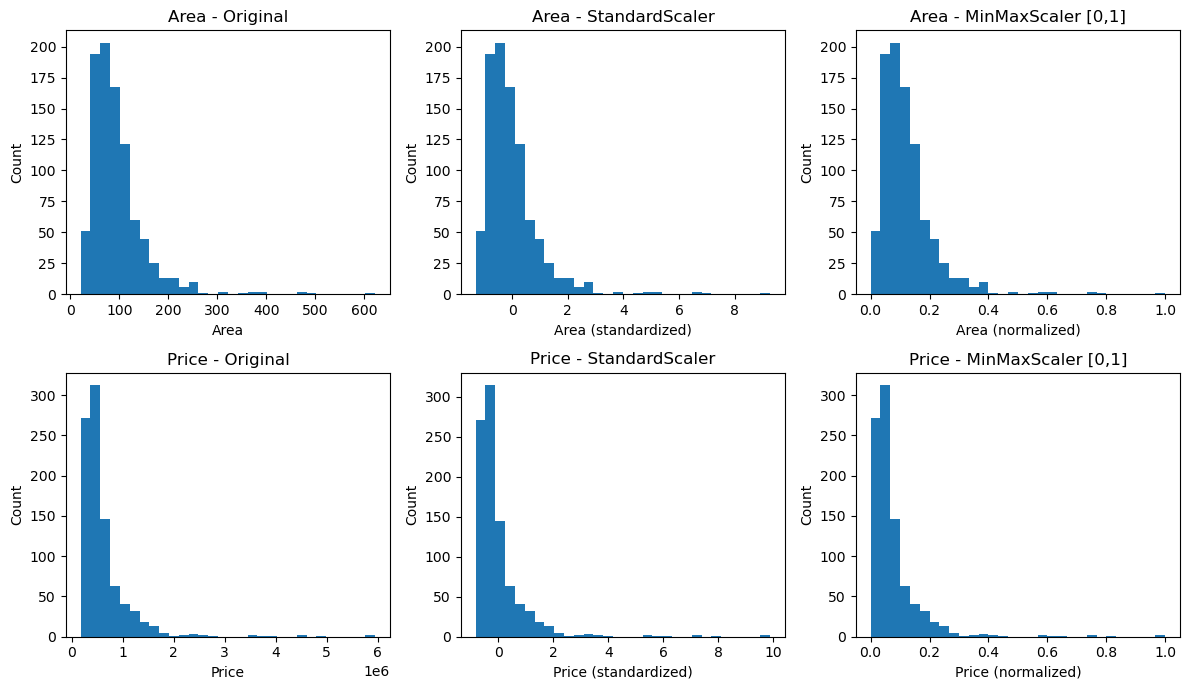

In [ ]:
# tạo 6 biểu đồ phụ (2 hàng, 3 cột) với kích thước 12 inch rộng và 7 inch cao.
fig, axes = plt.subplots(2, 3, figsize=(12, 7))
axes = axes.ravel() # 2D -> 1D, duyệt theo thứ tự hàng-cột
# vẽ histogram Area, bins: số cột, set_title/set_xlabel: thêm tiêu đề/trục X 
axes[0].hist(X['Area'], bins=30);       axes[0].set_title('Area - Original');           axes[0].set_xlabel('Area')
axes[1].hist(X['Area_std'], bins=30);   axes[1].set_title('Area - StandardScaler');     axes[1].set_xlabel('Area (standardized)')
axes[2].hist(X['Area_mm'], bins=30);    axes[2].set_title('Area - MinMaxScaler [0,1]'); axes[2].set_xlabel('Area (normalized)')
# vẽ histogram Price
axes[3].hist(X['Price'], bins=30);      axes[3].set_title('Price - Original');          axes[3].set_xlabel('Price')
axes[4].hist(X['Price_std'], bins=30);  axes[4].set_title('Price - StandardScaler');    axes[4].set_xlabel('Price (standardized)')
axes[5].hist(X['Price_mm'], bins=30);   axes[5].set_title('Price - MinMaxScaler [0,1]');axes[5].set_xlabel('Price (normalized)')
# Đặt cột Y cho toàn bộ historgram là Count
for ax in axes: ax.set_ylabel('Count')
plt.tight_layout(); plt.show() # tight_layout() căn chỉnh khoảng cách các subplot

## 1. Khai báo thư viện

In [3]:
import pandas as pd # Xử lý dữ liệu bảng (lọc nhóm, gộp, missing vaules)
import numpy as np # Tính toán với mảng, thống kê...
import matplotlib.pyplot as plt # Vẽ biểu đồ linh hoạt tùy biến
import seaborn as sns # Vẽ biểu đồ thống kê dựa vào matplotlib


In [4]:
housing_price_df = pd.read_csv("../dataset/HousingPrices-Amsterdam-August-2021.csv") # Sử dụng pandas và dùng read_csv để đọc dữ liệu csv
housing_price_df.head() # hiển thị 5 rows đầu tiên của dataset, head(default = 5)

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


1) Trước khi split thì cần kiểm tra thông tin dữ liệu của cột phải toàn vẹn

In [14]:
housing_price_df["Area"].unique()

array([ 64,  60, 109, 128, 138,  53,  87,  80,  49,  33,  69,  88,  45,
        70,  86, 105, 102,  78, 100,  52, 199,  71, 114,  75, 110,  89,
       134,  51, 235,  37,  98, 258,  83, 319,  74,  31,  47,  63,  43,
       163,  62,  91,  50, 120,  55,  79,  99,  82,  77,  81,  93,  73,
       160, 145,  61, 117,  72,  56,  54,  68,  65, 147,  94,  92, 101,
        84,  67,  32,  29,  97, 220, 124,  42,  95, 497,  58,  66,  35,
       111,  85, 165, 159,  57, 183, 135, 177,  59, 106, 113,  40, 132,
        41, 154, 230, 194, 178, 149,  96, 168, 153, 103, 141, 130, 150,
       166, 107, 171, 118,  39, 394, 115, 125, 121, 255,  25, 133, 245,
        38,  48,  23, 259, 158, 151, 146, 129, 119, 198, 207, 214, 162,
       250, 173, 232, 309, 216,  90, 186,  30, 187, 246, 374, 203, 175,
       257, 202, 387, 213, 623, 467, 131, 127, 148, 366, 139, 226, 104,
       348, 108,  26,  28,  44,  76, 136, 176,  36, 116, 122, 112,  46,
       123,  27, 142, 231, 126, 155, 180, 184, 212, 140, 161, 14

- Sử dụng unique() để xem toàn bộ dữ liệu có trong dataset, hiện tại chưa thấy dấu hiệu bất thường

2) Kiểm tra dữ liệu

In [15]:
has_null = housing_price_df["Area"].isnull().sum().any()
has_nan  = housing_price_df["Area"].isna().sum().any()
n_duplicated = housing_price_df["Area"].duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    display(housing_price_df[housing_price_df["Area"].isnull().any(axis=1)])
print(f'+ Có giá trị Nan: {has_nan}')

Tính toàn vẹn dữ liệu:
+ Có giá trị Null: False
+ Có giá trị Nan: False


- Sử dụng isnull() và isna() và sum() để đếm  trong cột Area có bị thiếu dữ liệu hay không. 
- Kết quả là dữ liệu của cột Area không bị thiếu

## 2 Chia train/test (train)

In [16]:
from sklearn.model_selection import train_test_split
X = housing_price_df[["Area"]] # cột scale
X_train, X_test = train_test_split(X, test_size=0.3, random_state=42)

## 3 Fit & transform với StandardScaler và MinMaxScaler

In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_scaler = StandardScaler()
mm_scaler  = MinMaxScaler(feature_range=(0, 1))  # [0,1]

# FIT trên train
X_train_std = std_scaler.fit_transform(X_train)
X_train_mm  = mm_scaler.fit_transform(X_train)

# transform test (không fit lại)
X_test_std  = std_scaler.transform(X_test)
X_test_mm   = mm_scaler.transform(X_test)

# Ghép để so sánh
train_scaled = X_train.copy() # bảo vệ train gốc
train_scaled["Area_std"]    = X_train_std
train_scaled["Area_minmax"] = X_train_mm

test_scaled = X_test.copy() # bảo vệ test gốc
test_scaled["Area_std"]    = X_test_std
test_scaled["Area_minmax"] = X_test_mm


- MinMaxScaler, giá trị sau scale được ánh xạ tuyến tính vào khoảng [a, b] và mặc định a = 0 b = 1
> nếu test có giá trị vượt min/max của train, sau scale nó có thể < a hoặc > b (điều này là đúng hành vi).
- Việc chỉ fit trên tập train để ránh rò rỉ dữ liệu (data leakage), nếu fit trên toàn bộ (train+test), thống kê như min/max (MinMax) hay mean/std (Standard) đã “ngó” test → kết quả đánh giá bị lạc quan giả. Đảm bảo đúng quy trình triển khai thực tế: khi đưa mô hình vào production,  không có dữ liệu tương lai để cập nhật scaler. Scaler phải học từ quá khứ (train) và áp lên tương lai (validation/test/new data).

- Sau khi fit trên train thì chỉ cần Transform trên các thứ khác test vì nếu fit trên test:
    - Phá vỡ tính nhất quán (train/test không cùng thang).
    - Vi phạm nguyên tắc đánh giá (test chưa thấy giá trị).


## 4 Kiểm tra nhanh

In [18]:
# StandardScaler
mean_std = train_scaled["Area_std"].mean()
std_std  = train_scaled["Area_std"].std(ddof=0) # làm tròn sai số

# MinMaxScaler
mm_min = test_scaled["Area_minmax"].min()
mm_max = test_scaled["Area_minmax"].max()

print(f"StandardScaler -> mean(train)≈{mean_std:.4f}, std(train)≈{std_std:.4f}")
print(f"MinMaxScaler   -> min(test)≈{mm_min:.4f}, max(test)≈{mm_max:.4f}")


StandardScaler -> mean(train)≈0.0000, std(train)≈1.0000
MinMaxScaler   -> min(test)≈0.0084, max(test)≈1.2647


- Do fit trên train nên giá trị STD trong train_scaled có giá trị MEAN = 0 và STD = 1 (dùng)
- min(test) ≈ 0.0084 > 0: không có điểm test nào nhỏ hơn min_train.
- max(test) ≈ 1.2647 > 1: có ít nhất một điểm test lớn hơn max_train, nên sau scale nó vượt 1.0.
> Kết quả này cho thấy đối với bước scaling bằng MinMax, việc test có giá trị ngoài [0,1] là tín hiệu đúng hướng rằng đã fit-on-train.

## 5 Dùng với mẫu mới (production)

In [19]:
new = pd.DataFrame({"Area": [180]})  # ví dụ 180 m²
z  = std_scaler.transform(new)       # z-score
s  = mm_scaler.transform(new)        # [0,1]
print("New Area=180 -> Standard:", z.ravel()[0], " | MinMax:", s.ravel()[0])

New Area=180 -> Standard: 1.6009888084224786  | MinMax: 0.33403361344537813


-   Với Area = 180 thì lệch phía cao hơn mức trung bình khoảng 1.6 độ lệch chuẩn 
- 0.334 nghĩa là 180 m² đang ở 33.4% quãng đường từ min_train lên max_train (tính theo thang [0,1] bạn đã thiết lập).
    - Nếu kết quả >1 hoặc <0, đó là dấu hiệu giá trị mới vượt biên train (điều này bình thường khi fit-on-train).

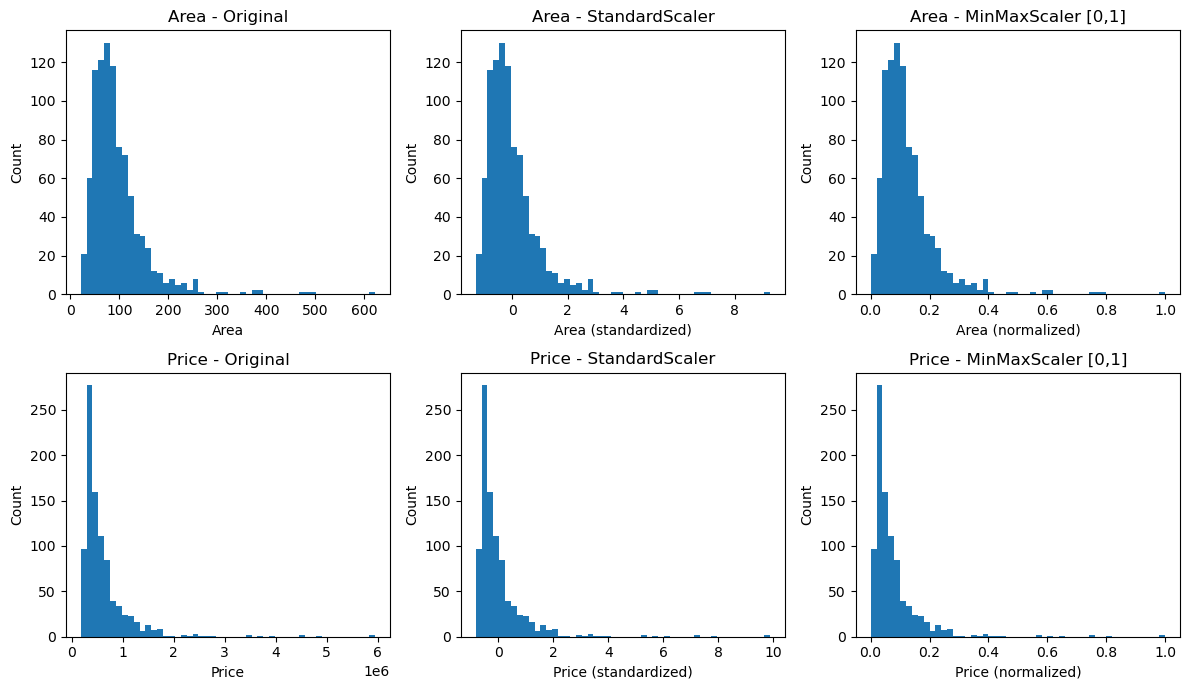


=== Area stats ===
         Original Area: mean=95.608, std=56.819, min=21.000, max=623.000
     Standardized Area: mean=-0.000, std=1.000, min=-1.313, max=9.282
           MinMax Area: mean=0.124, std=0.094, min=0.000, max=1.000

=== Price stats ===
        Original Price: mean=622065.420, std=538701.164, min=175000.000, max=5950000.000
    Standardized Price: mean=0.000, std=1.000, min=-0.830, max=9.890
          MinMax Price: mean=0.077, std=0.093, min=0.000, max=1.000


In [20]:

# 3) Vẽ 2x3 histogram: Original / Standard / MinMax cho Area & Price
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 7))

# Row 1: Area
axes[0, 0].hist(data["Area"].values, bins=50)
axes[0, 0].set_title("Area - Original")
axes[0, 0].set_xlabel("Area"); axes[0, 0].set_ylabel("Count")

axes[0, 1].hist(area_std, bins=50)
axes[0, 1].set_title("Area - StandardScaler")
axes[0, 1].set_xlabel("Area (standardized)"); axes[0, 1].set_ylabel("Count")

axes[0, 2].hist(area_mm, bins=50)
axes[0, 2].set_title("Area - MinMaxScaler [0,1]")
axes[0, 2].set_xlabel("Area (normalized)"); axes[0, 2].set_ylabel("Count")

# Row 2: Price
axes[1, 0].hist(data["Price"].values, bins=50)
axes[1, 0].set_title("Price - Original")
axes[1, 0].set_xlabel("Price"); axes[1, 0].set_ylabel("Count")

axes[1, 1].hist(price_std, bins=50)
axes[1, 1].set_title("Price - StandardScaler")
axes[1, 1].set_xlabel("Price (standardized)"); axes[1, 1].set_ylabel("Count")

axes[1, 2].hist(price_mm, bins=50)
axes[1, 2].set_title("Price - MinMaxScaler [0,1]")
axes[1, 2].set_xlabel("Price (normalized)"); axes[1, 2].set_ylabel("Count")

plt.tight_layout()
plt.show()

# 4) (Tuỳ chọn) In thống kê nhanh để thấy khác biệt thang đo
def quick_stats(name, arr):
    print(f"{name:>22}: mean={np.mean(arr):.3f}, std={np.std(arr, ddof=0):.3f}, "
          f"min={np.min(arr):.3f}, max={np.max(arr):.3f}")

print("\n=== Area stats ===")
quick_stats("Original Area", data["Area"].values)
quick_stats("Standardized Area", area_std)
quick_stats("MinMax Area", area_mm)

print("\n=== Price stats ===")
quick_stats("Original Price", data["Price"].values)
quick_stats("Standardized Price", price_std)
quick_stats("MinMax Price", price_mm)


# Bài tập Encoding (OneHotEncoder)

In [9]:
from sklearn.preprocessing import OneHotEncoder

# 1) Chọn/đổi tên cột Zip
if "Zip" not in df.columns:
    cand = [c for c in df.columns if "zip" in c.lower() or "postal" in c.lower()]
    if cand: df = df.rename(columns={cand[0]:"Zip"})

# 2) (khuyến nghị) rút gọn: gộp nhãn hiếm thành 'Other' bằng min_frequency (sklearn>=1.1)
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False, min_frequency=0.01) 
# -> gộp các mã Zip xuất hiện <1% vào bin chung

zip_ohe = ohe.fit_transform(df[["Zip"]])
zip_cols = ohe.get_feature_names_out(["Zip"])

zip_df = pd.DataFrame(zip_ohe, columns=zip_cols, index=df.index)
df_ohe = pd.concat([df.drop(columns=["Zip"]), zip_df], axis=1)

print(zip_df.head())


NameError: name 'df' is not defined

# Bài tập Pipeline (StandardScaler + LinearRegression)

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Giả sử 'Price' là target (đổi tên nếu cột khác)
y = pd.to_numeric(df["Price"], errors="coerce")
X = df[["Area"]]  # ví dụ chỉ dùng Area; có thể thêm numeric khác

# pipeline: scale numeric -> LinearRegression
numeric_features = ["Area"]
preprocess = ColumnTransformer(
    transformers=[("num", StandardScaler(), numeric_features)],
    remainder="drop"
)

pipe_lin = Pipeline([
    ("prep", preprocess),
    ("model", LinearRegression())
])

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42)
pipe_lin.fit(X_tr, y_tr)
r2 = pipe_lin.score(X_te, y_te)
print("LinearRegression (scaled) | R^2=%.4f" % r2)


# Bài tập GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Ví dụ đặc trưng gồm: Area (num) + Zip (one-hot)
num_cols = ["Area"]
cat_cols = ["Zip"]

preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", min_frequency=0.01, sparse_output=False), cat_cols),
    ],
    remainder="drop"
)

rf = RandomForestRegressor(random_state=42, n_jobs=-1)

pipe_rf = Pipeline([
    ("prep", preprocess),
    ("rf", rf)
])

param_grid = {
    "rf__n_estimators": [200, 400, 800],
    "rf__max_depth": [None, 10, 20, 40],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4]
}

X = df[ num_cols + cat_cols ].copy()
y = pd.to_numeric(df["Price"], errors="coerce")
mask = y.notna() & X["Area"].notna() & X["Zip"].notna()
X, y = X.loc[mask], y.loc[mask]

gs = GridSearchCV(
    pipe_rf, param_grid,
    scoring="neg_root_mean_squared_error",  # hoặc 'r2'
    cv=5, n_jobs=-1, verbose=1
)
gs.fit(X, y)

print("Best params:", gs.best_params_)
print("Best CV score (RMSE):", -gs.best_score_)
best_model = gs.best_estimator_


5) Đồ án nhỏ Phân loại — Wine quality (winequality-red.csv)

In [ ]:
# Dự đoán 'good wine' (quality >= 6)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
import numpy as np

wine = pd.read_csv("/mnt/data/winequality-red.csv", sep=";")
X = wine.drop(columns=["quality"])
y = (wine["quality"] >= 6).astype(int)  # 1=good, 0=not-good

X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipe_cls = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=2000))
])

param_grid = {
    "clf__C": [0.1, 1, 10, 100],
    "clf__penalty": ["l2"],             # lbfgs hỗ trợ l2
    "clf__solver": ["lbfgs"]
}

gs_cls = GridSearchCV(pipe_cls, param_grid, scoring="f1", cv=5, n_jobs=-1, verbose=1)
gs_cls.fit(X_tr, y_tr)

y_pred = gs_cls.predict(X_te)
y_prob = gs_cls.predict_proba(X_te)[:,1]

print("Best params:", gs_cls.best_params_)
print("Accuracy:", accuracy_score(y_te, y_pred))
p, r, f1, _ = precision_recall_fscore_support(y_te, y_pred, average="binary")
print("Precision:", p, "Recall:", r, "F1:", f1)
print("ROC-AUC:", roc_auc_score(y_te, y_prob))
print("\nClassification report:\n", classification_report(y_te, y_pred, digits=3))


6) Đồ án nhỏ Phân cụm — Mall Customers (K-means + trực quan)

In [ ]:
# Tải "Mall_Customers.csv" (các cột phổ biến: 'Age', 'Annual Income (k$)', 'Spending Score (1-100)')
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

mall = pd.read_csv("/mnt/data/Mall_Customers.csv")
feat = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
X = mall[feat].dropna().copy()

# Scale trước khi K-means
scaler = StandardScaler().fit(X)
Xs = scaler.transform(X)

# Chọn k bằng elbow + silhouette
inertias, sils, ks = [], [], range(2, 10)
for k in ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = km.fit_predict(Xs)
    inertias.append(km.inertia_)
    sils.append(silhouette_score(Xs, labels))

print(list(zip(ks, inertias, sils)))  # tham khảo nhanh

# Ví dụ chọn k=5 (phổ biến với dataset này)
k = 5
km = KMeans(n_clusters=k, n_init=10, random_state=42).fit(Xs)
mall["cluster"] = km.labels_

# Trực quan 2D (Annual Income vs Spending Score)
plt.figure()
for c in range(k):
    subset = mall[mall["cluster"] == c]
    plt.scatter(subset["Annual Income (k$)"], subset["Spending Score (1-100)"], label=f"Cluster {c}", alpha=0.7)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-means Clusters (k=5)")
plt.legend()
plt.show()


In [11]:
# thư viện
import numpy as np # tính toán dữ liệu
import pandas as pd # tạo DataFrame
import matplotlib.pyplot as plt # vẽ biểu đồ
from sklearn.linear_model import LinearRegression # model
from sklearn.model_selection import train_test_split # split dữ liệu
import random # ngẫu nhiên số


In [12]:
# dữ liêu đầu vào
areas = [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290] # feature
prices = [3 * area + 50 + random.randint(-50, 50) for area in areas] # target
# y = LinearRegression() => 3x + 50 + [-50, 50]
print(prices)

[197, 213, 251, 305, 361, 321, 417, 430, 433, 429, 481, 553, 543, 566, 640, 655, 665, 718, 788, 726, 756, 833, 844, 910, 944]


In [14]:
# tách dữ liệu
df = pd.DataFrame({"area": areas, "price": prices})
X_train, X_test, y_train, y_test = train_test_split(
    df[["area"]], df["price"], test_size=0.2, random_state=42 # chia 20% dữ liệu test
)
X_train.head()

,area
9,140
13,180
1,60
22,270
5,100


In [15]:
# Train model
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = Linear_model.predict(X_test)
y_pred

NameError: name 'Linear_model' is not defined

c:\Users\luong\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


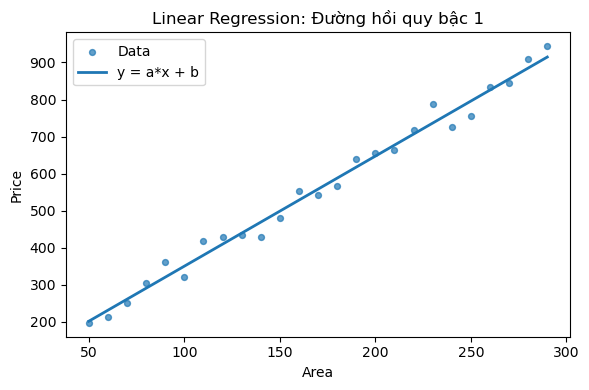

In [17]:
# chart
x_line = np.linspace(df["area"].min(), df["area"].max(), 200).reshape(-1, 1) 
y_line = linreg.predict(x_line)

plt.figure(figsize=(6,4))
plt.scatter(df["area"], df["price"], s=18, alpha=0.7, label="Data")
plt.plot(x_line, y_line, linewidth=2, label="y = a*x + b")
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("Linear Regression: Đường hồi quy bậc 1")
plt.legend()
plt.tight_layout()
plt.show()

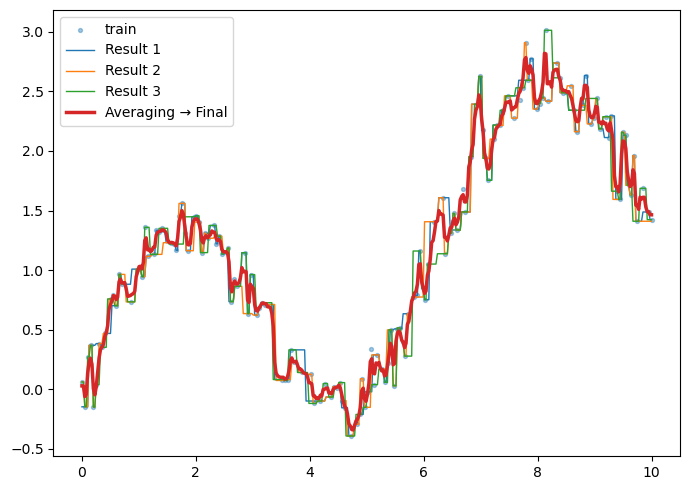

In [2]:
import numpy as np, matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Data 1D đơn giản
rng = np.random.default_rng(42)
X = np.linspace(0, 10, 200)[:, None]
y = np.sin(X[:,0]) + 0.2*X[:,0] + rng.normal(0, 0.2, 200)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.25, random_state=42)

# Train rừng
rf = RandomForestRegressor(n_estimators=100, random_state=42).fit(Xtr, ytr)

# Lưới để vẽ
xx = np.linspace(X.min(), X.max(), 400)[:, None]

# 3 cây (Result 1–3) + trung bình (Final)
trees_preds = [est.predict(xx) for est in rf.estimators_[:3]]
avg_pred   = rf.predict(xx)

# Vẽ: điểm dữ liệu + 3 cây + trung bình
plt.figure(figsize=(7,5))
plt.scatter(Xtr, ytr, s=8, alpha=0.4, label="train")
for i, yp in enumerate(trees_preds, 1):
    plt.plot(xx, yp, linewidth=1, label=f"Result {i}")
plt.plot(xx, avg_pred, linewidth=2.5, label="Averaging → Final")
plt.legend(); plt.tight_layout(); plt.show()
